## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo2mesh.misc import viewer
from tomo2mesh import DataFile
from skimage.filters import threshold_otsu
from tomo2mesh import Voids

In [2]:
Vx = DataFile('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/full_rec/2k_rec/', tiff = True).read_full()
# Vp = DataFile('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/full_rec/2k_seg/', tiff = True).read_full()


##################################################
Found existing tiff folder: 
Dataset shape: (2048, 2048, 2048)


In [3]:
voids = Voids().import_from_disk('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/voids_data/c2f_2k_b_2_subset')

In [40]:
from copy import deepcopy
voids_sph = deepcopy(voids)
void_id = np.argmax(voids_sph["sizes"])
voids_sph.select_around_void(void_id, 800.0, pixel_size_um=2.34)

	STAT: number of voids selected - 6682


In [41]:
# make mask  
voidid = np.argmax(voids["sizes"])
cents = voids["cents"][voidid]
cents[0] = 600

In [42]:
grid, r_fac = voids.export_grid(32)
Vm = np.zeros(grid.vol_shape, dtype = np.uint8)
grid.fill_patches_in_volume(np.ones((len(grid),32,32,32), dtype = np.uint8), Vm)

	STAT: 1/r value: 2.24


In [43]:
Vp = np.zeros(grid.vol_shape, dtype = np.uint8)
for iv, s_void in enumerate(voids["s_voids"]):
    Vp[s_void] += voids["x_voids"][iv]
Vp = (Vp>0).astype(np.uint8)

In [49]:
grid_sph, _ = voids_sph.export_grid(32)
Vs = np.zeros(grid_sph.vol_shape, dtype = np.uint8)
grid_sph.fill_patches_in_volume(np.ones((len(grid_sph),32,32,32), dtype = np.uint8), Vs)

	STAT: 1/r value: 60.85


In [50]:
imx = viewer.get_orthoplanes(vol = Vx, idxs = cents)
imp = viewer.get_orthoplanes(vol = Vp, idxs = cents)
imm = viewer.get_orthoplanes(vol = Vm, idxs = cents)
ims = viewer.get_orthoplanes(vol = Vs, idxs = cents)

In [51]:
pixel_res = 1.17 # micrometer per pixel
def transform_ax2(img):
    img = np.fliplr(img)
    img = np.rot90(img)
    return img
shading = 'copper'

(-0.5, 2047.5, 2047.5, -0.5)

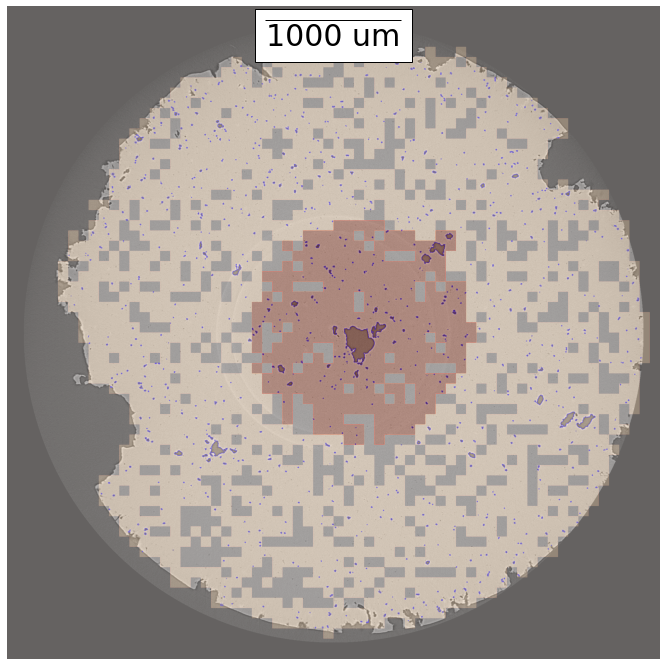

In [63]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[0], imp[0], ax, color =[0,0,255])
ax.imshow(imm[0], cmap = shading, alpha = 0.25)
ax.imshow(ims[0], cmap = "Reds", alpha = 0.25)
viewer.add_scalebar(ax, 1000, 2.34, loc = 'upper center', fontsize = 30)
ax.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

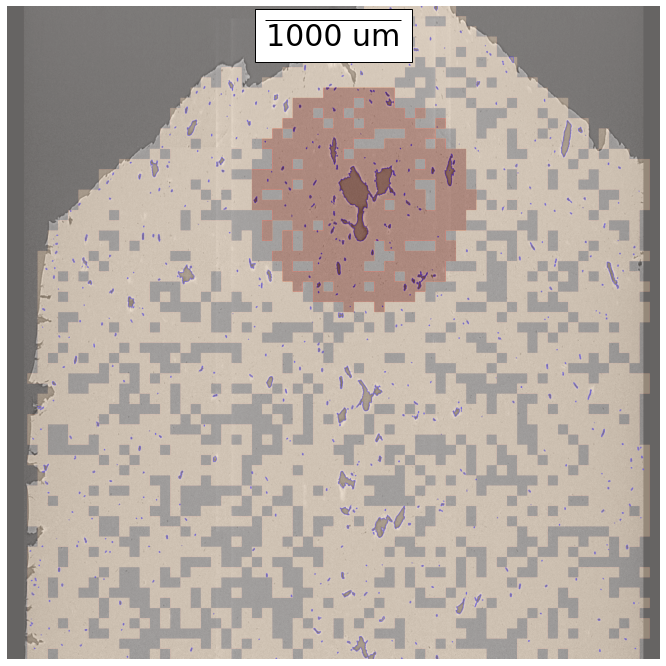

In [64]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[1], imp[1], ax, color =[0,0,255])
ax.imshow(imm[1], cmap = shading, alpha = 0.25)
ax.imshow(ims[1], cmap = "Reds", alpha = 0.25)
viewer.add_scalebar(ax, 1000, 2.34, loc = 'upper center', fontsize = 30)
ax.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

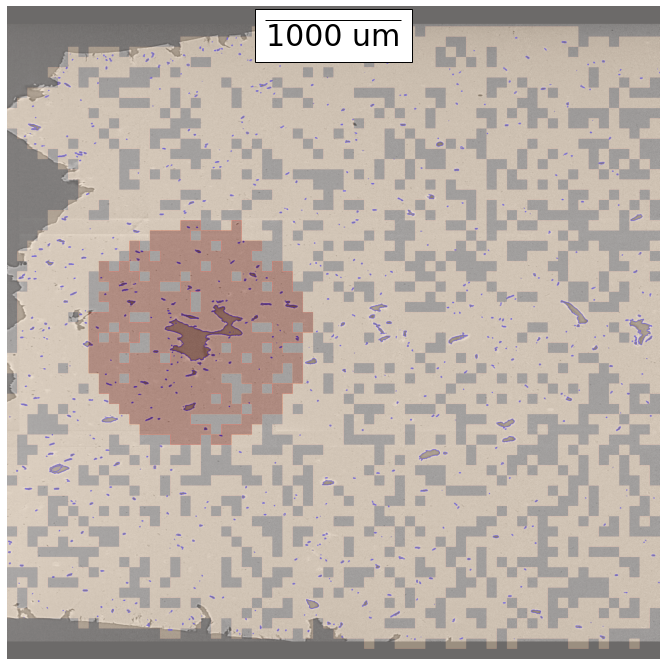

In [65]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(transform_ax2(imx[2]), transform_ax2(imp[2]), ax, color =[0,0,255])
ax.imshow(transform_ax2(imm[2]), cmap = shading, alpha = 0.25)
ax.imshow(transform_ax2(ims[2]), cmap = "Reds", alpha = 0.25)
viewer.add_scalebar(ax, 1000, 2.34, loc = 'upper center', fontsize = 30)
ax.axis('off')

In [92]:
# ! python -c "import pandas as pd; df = pd.read_csv('/data02/MyArchive/tomo_datasets/data_porosity_mapping_paper/time_logs/smartvis_times_4k.csv');print(df.groupby('criteria').min())"

                          sparsity (${1/r}$)  ${t_{mapping}}$  ${t_{mesh}}$
criteria                                                                   
cylindrical_neighborhood           42.766727       185.938531    153.245109
none                               16.581816       433.145781    273.301969
spherical_neighborhood            341.500081        82.331836     81.164766
